# EJERCICIOS DE PROGRAMACIÓN USANDO PCA

A continuación se plantean una serie de ejercicios. Por favor, responde a las preguntas que plantean. A parte de ello, no olvides adjuntar el código empleado para producir las respuestas a cada ejercicio.

1. (2.5 puntos). Carga el archivo de datos “Ingredient_data.xlsx”, el cual contiene información en 5 variables diferentes representadas en sus 5 columnas (aluminato tricálcico, silicato tricálcico, aluminoferrito tetracálcico, silicato beta-dicálcico, calor durante endurecimiento a lo largo de 180 días) para 12 ingredientes diferentes. Aunque el conjunto de datos está caracterizado por 5 variables, representa los observaciones en un scatterplot de 3 dimensiones caracterizado por las 2 primeras variables y la última: aluminato tricálcico (columna 1), silicato tricálcico (columna 2) y calor durante endurecimiento a lo largo de 180 días (columna 5). Haz que en el gráfico los diferentes ejes tengan el nombre correspondiente: “aluminato tricálcico”, “silicato tricálcico” y “calor”.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ingredient_data=pd.read_excel("Ingredient_data.xls", header=None)

ingredient_data.shape

(13, 5)

In [3]:
nombres=['aluminato tricálcico', 'silicato tricálcico', 'aluminoferrito tetracálcico', 'silicato beta-dicálcico', 'calor 180 días']

ingredient_data.columns=nombres

ingredient_data.head()

,aluminato tricálcico,silicato tricálcico,aluminoferrito tetracálcico,silicato beta-dicálcico,calor 180 días
0,7,26,6,60,78.5
1,1,29,15,52,74.3
2,11,56,8,20,104.3
3,11,31,8,47,87.6
4,7,52,6,33,95.9


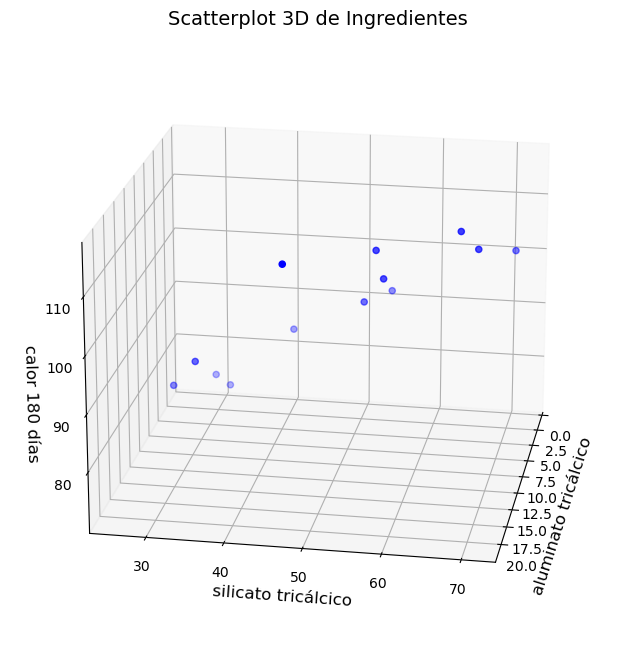

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x = ingredient_data['aluminato tricálcico']
y = ingredient_data['silicato tricálcico']
z = ingredient_data['calor 180 días']

ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('aluminato tricálcico',fontsize=12)
ax.set_ylabel('silicato tricálcico',fontsize=12)
ax.set_zlabel('calor 180 días',fontsize=12)

ax.view_init(elev=20,azim=10)

plt.title("Scatterplot 3D de Ingredientes",fontsize=14)
plt.show()


2. (2.5 puntos). Normaliza los datos de tal manera que su media sea 0 y su desviación típica 1. Indica los valores de la media y la desviación típica de los datos resultantes de la normalización.
Seguidamente, realiza un análisis de componentes principales en el que extraigas los 3 principales componentes mediante los cuales podrías llevar a cabo una reducción de la dimensionalidad. Indicar los autovectores correspondientes a cada uno de estos 3 componentes e indica también el autovalor de cada uno.


In [5]:
#Normalizacion

from sklearn.preprocessing import StandardScaler
x=ingredient_data.loc[:,nombres].values
x=StandardScaler().fit_transform(x)



In [6]:
np.mean(x),np.std(x)

(2.049642507000289e-17, 0.9999999999999999)

In [7]:
feat_cols=['nombres'+str(i) for i in range(x.shape[1])]

normalised_ingredient=pd.DataFrame(x,columns=feat_cols)

normalised_ingredient.tail()

,nombres0,nombres1,nombres2,nombres3,nombres4
8,-0.966367,0.391036,1.0125,-0.497465,-0.160727
9,2.395500,-0.077178,-1.2625,-0.248733,1.416741
10,-1.143307,-0.545393,1.8250,0.248733,-0.804168
11,0.626097,1.193690,-0.4500,-1.119297,1.236854
12,0.449156,1.327465,-0.6125,-1.119297,0.967024


In [21]:
np.mean(normalised_ingredient)

c:\Users\alici\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


nombres0   -3.843080e-17
nombres1    0.000000e+00
nombres2   -1.195625e-16
nombres3    0.000000e+00
nombres4    2.220446e-16
dtype: float64

In [22]:
np.std(normalised_ingredient)

nombres0    1.0
nombres1    1.0
nombres2    1.0
nombres3    1.0
nombres4    1.0
dtype: float64

In [8]:
#PCA
from sklearn.decomposition import PCA
pca_ingredient=PCA(n_components=3)
principalComponents_ingredient=pca_ingredient.fit_transform(x)

In [9]:
#Autovectores

np.transpose(pca_ingredient.components_) #en vertical para que filas=variables y columnas=componentes principales

array([[-0.40115034, -0.51247785,  0.58088361],
       [-0.46827113,  0.40959776, -0.38985593],
       [ 0.31889626,  0.60802569,  0.6746767 ],
       [ 0.460288  , -0.4470898 , -0.10385812],
       [-0.55339017,  0.00340611,  0.21121418]])

In [10]:
pca_ingredient.components_

array([[-0.40115034, -0.46827113,  0.31889626,  0.460288  , -0.55339017],
       [-0.51247785,  0.40959776,  0.60802569, -0.4470898 ,  0.00340611],
       [ 0.58088361, -0.38985593,  0.6746767 , -0.10385812,  0.21121418]])

In [11]:
#Autovalores

pca_ingredient.explained_variance_   #sorprendentemente esto nos indica que podriamos reducir a 2 componentes

array([3.47926995, 1.70745323, 0.21554644])

In [12]:
#Varianza explicada por cada componente

pca_ingredient.explained_variance_ratio_  #con los primeros componentes ya explicamos mas del 80% de la muestra

array([0.64232676, 0.31522213, 0.03979319])

In [13]:
#puntuaciones de los ejemplares en los 3 componentes principales

principal_ingredient_df=pd.DataFrame(data=principalComponents_ingredient, 
                                 columns=['principal component 1', 'principal component 2','principal component 3'])

principal_ingredient_df 

,principal component 1,principal component 2,principal component 3
0,1.934297,-1.973155,-0.543299
1,2.664426,-0.236237,-0.261215
2,-1.318334,-0.198208,-0.059848
3,0.876906,-1.637710,0.173653
4,-0.319067,-0.506091,-0.792647
5,-1.365556,-0.181249,0.134553
6,-1.093385,2.216253,-0.219502
7,2.804467,0.732174,0.479438
8,0.387397,1.492899,-0.012966
9,-2.225921,-1.910854,0.894885


3. (2.5 puntos). Haz un PCA en el que extraigas los 2 componentes principales. Seguidamente, haz un DataFrame en el que para cada uno de los ingredientes se especifique su puntuación en el componente principal 1 y en el componente principal 2. Llama a las columnas de este DataFrame “componente principal 1” y “componente principal 2” respectivamente, y muestra muestra los valores numéricos de dicho DataFrame (para ello, puedes simplemente generar el DataFrame e imprimirlo en la ventana de comandos con la función “print”. Seguidamente, basta con que pegues una captura de pantalla del output en tu respuesta). 
¿Qué porcentaje de la varianza total de los datos explican respectivamente el componente principal 1 y el componente principal 2?


In [14]:
pca_ingredient_2=PCA(n_components=2)

principalComponents_ingredient2=pca_ingredient_2.fit_transform(x)

In [15]:
principal_ingredient2_df=pd.DataFrame(data=principalComponents_ingredient2,
                                      columns=['componente principal 1', 'componente principal 2'])

principal_ingredient2_df

,componente principal 1,componente principal 2
0,1.934297,-1.973155
1,2.664426,-0.236237
2,-1.318334,-0.198208
3,0.876906,-1.637710
4,-0.319067,-0.506091
5,-1.365556,-0.181249
6,-1.093385,2.216253
7,2.804467,0.732174
8,0.387397,1.492899
9,-2.225921,-1.910854


In [16]:
pca_ingredient_2.explained_variance_ratio_

array([0.64232676, 0.31522213])

4. (2.5 puntos). Representa gráficamente los datos en función de los 2 componentes principales identificados. En la representación gráfica, llama a los ejes x e y “componente principal 1” y “componente principal 2” respectivamente.

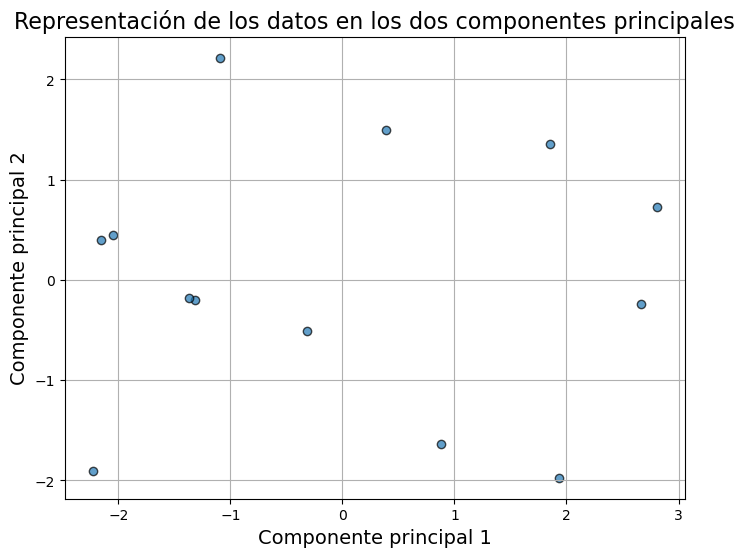

Proporción de varianza explicada por cada componente:
Componente principal 1: 0.64
Componente principal 2: 0.32


In [17]:

# Generar la gráfica
plt.figure(figsize=(8, 6))
plt.scatter(
    principal_ingredient2_df['componente principal 1'], 
    principal_ingredient2_df['componente principal 2'], 
    alpha=0.7, edgecolor='k'
)

# Etiquetar los ejes
plt.xlabel('Componente principal 1', fontsize=14)
plt.ylabel('Componente principal 2', fontsize=14)
plt.title('Representación de los datos en los dos componentes principales', fontsize=16)

# Mostrar la gráfica
plt.grid(True)
plt.show()

# Proporciones de varianza explicada
explained_variance_ratio = pca_ingredient_2.explained_variance_ratio_
print("Proporción de varianza explicada por cada componente:")
print(f"Componente principal 1: {explained_variance_ratio[0]:.2f}")
print(f"Componente principal 2: {explained_variance_ratio[1]:.2f}")
